In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(r'D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data\Data_UF_cleaned.csv', encoding = 'latin1')

## Time Series Index

In [5]:
# Convert 'Date' to Datetime and set as index
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df.set_index('Creation Date',inplace = True)


In [6]:
df.index

DatetimeIndex(['2023-12-03', '2023-12-03', '2023-12-03', '2023-12-04',
               '2023-12-04', '2023-12-05', '2023-12-05', '2023-12-05',
               '2023-12-06', '2023-12-06',
               ...
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09'],
              dtype='datetime64[ns]', name='Creation Date', length=28623, freq=None)

In [7]:
df.loc['2025-1']['Revenue']


Creation Date
2025-01-01     39900
2025-01-01     39900
2025-01-01     39900
2025-01-01    478800
2025-01-01     39900
               ...  
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
Name: Revenue, Length: 2224, dtype: int64

In [8]:
df = df[df['Revenue'] != 0]
df = df.groupby(df.index).sum()

In [9]:
#Resampling to Monthly Frequancy and Calculate the mean closing price
df['Revenue'].resample('M').mean()

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_28840\3542015835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

## EDA

In [10]:
# Filter and make a copy to avoid SettingWithCopyWarning
df = df[df['Sales Method'] != 'Bundle'].copy()
df.loc['2025']['Sales Method'].unique()

array(['CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCod

<Axes: xlabel='Creation Date'>

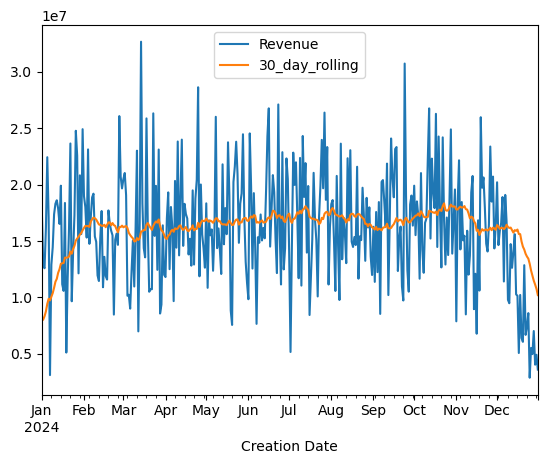

In [11]:
df = df[df['Revenue'] > 0] 
# Now safely calculate rolling average
df['30_day_rolling'] = df['Revenue'].rolling(window=30).mean()

# Plot for 2024
df[['Revenue', '30_day_rolling']].loc['2024'].plot()



In [12]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday
df['is_weekend'] = df.index.weekday > 4 # Check for weekend

df.head()

,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,OrderID/RegCode,Transaction Code,...,Internet Package,Cancellation Date,Sales Method,30_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Creation Date,,,,,,,,,,,,,,,,,,,,,
2023-12-03,SIM1000000952SIM1000003875SIM1000004226,0,109,04.Hai Phong06.Khanh Hoa10.Vung Tau,BTENBHBTN,OBBIBB,HBHDNISLA,13.Tay Nguyen - Mien Trung01.Ha Noi10.Vung Tau,SIMORDER952SIMORDER3875SIMORDER4226,0,...,Giga F1FTTH - Super500Sky,0,ExtraCodeCode,NaN,2023,12,3,Sunday,6,True
2023-12-04,SIM1000002839SIM1000003079,0,54,07.Ho Chi Minh06.Khanh Hoa,DLKHCM_03,OBBCBB,TGGHNI_02,02.Quang Ninh10.Vung Tau,SIMORDER2839SIMORDER3079,0,...,Meta F2FTTH - Super500,0,CodeCode,NaN,2023,12,4,Monday,0,False
2023-12-05,SIM1000001125SIM1000002091SIM1000004750,2,122,05.Da Nang05.Da Nang09.Binh Duong,CTOHCM_02HBH,IBBIBB,HPGHNI_05DKG,04.Hai Phong02.Quang Ninh08.Dong Nai,SIMORDER1125SIMORDER2091SIMORDER4750,0,...,Meta F2MetaGiga F1,0,CodeCodeCode,NaN,2023,12,5,Tuesday,1,False
2023-12-06,SIM1000000788SIM1000000842SIM1000001051SIM1000...,1,204,15.Tay Nam Bo03.Hai Duong14.Dong Nam Bo11.Tay ...,THAHYNHNI_03DKG,IBBCBBCBB,HNI_05HNI_02BTNBTN,12.Dong Bac Bo06.Khanh Hoa12.Dong Bac Bo10.Vun...,SIMORDER788SIMORDER842SIMORDER1051SIMORDER1774,0,...,SkyFTTH - Super500Giga - MultiFTTH - Super400,0,ExtraCodeCodeCode,NaN,2023,12,6,Wednesday,2,False
2023-12-08,SIM1000000782SIM1000001239SIM1000002650SIM1000...,4,183,09.Binh Duong04.Hai Phong14.Dong Nam Bo11.Tay ...,HCM_01HNMQTITNNPTO,OBBIBBIBB,VLGBTNLDGTBHHCM_06,14.Dong Nam Bo08.Dong Nai02.Quang Ninh03.Hai D...,SIMORDER782SIMORDER1239SIMORDER2650SIMORDER294...,0,...,Sky F3Sky F1FTTH - Super250Giga F1Sky F2,0,CodeCodeCodeExtraCode,NaN,2023,12,8,Friday,4,False


In [13]:
# Feature Enegineering - Lagged values
df['Revenue_lag1'] = df['Revenue'].shift(1)
df['Revenue_lag2'] = df['Revenue'].shift(2)

## Seasonal Decomposition

In [14]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
df['Revenue'].resample('M').mean()


C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_28840\1463569539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_28840\2711891604.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Revenue'].resample('M').mean())


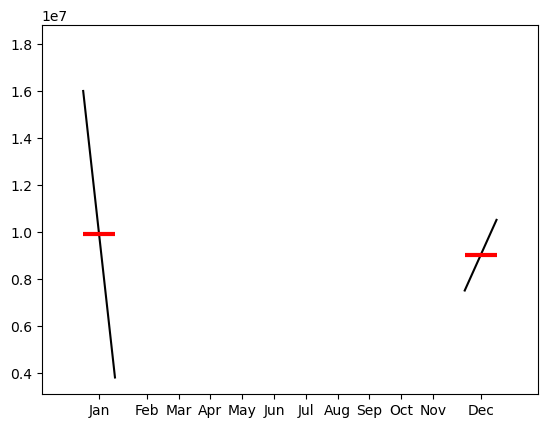

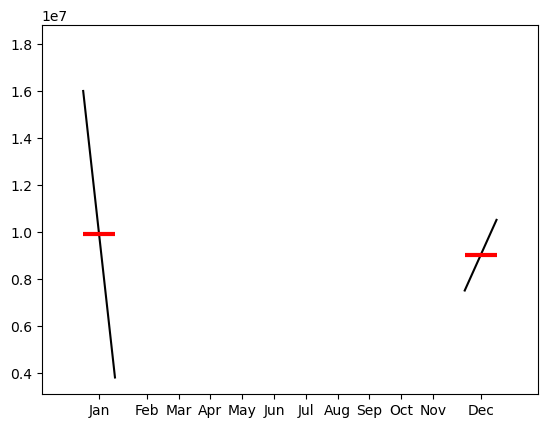

In [16]:
month_plot(df['Revenue'].resample('M').mean())

Due to the limited data range from December 2023 to January 2025, there is not enough information to identify or analyze seasonal patterns across months

<Axes: xlabel='Creation Date'>

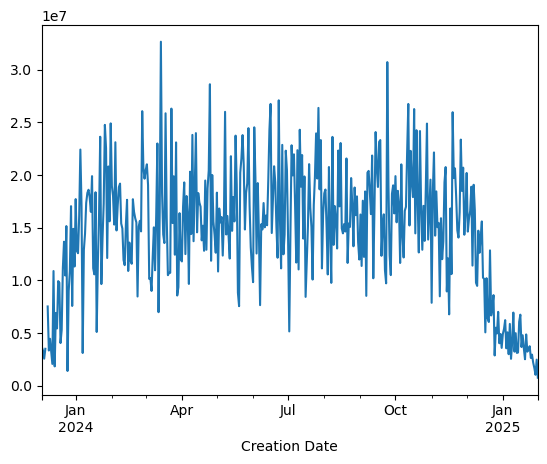

In [17]:
df['Revenue'].resample('D').mean().plot()


In [18]:
df.isnull().sum()


Contract_ID            0
Gender                 0
Age                    0
Region                 0
Managing Branch        0
Sales Unit             0
Selling branch         0
Sales Region           0
OrderID/RegCode        0
Transaction Code       0
Type                   0
FG Package Command     0
Payment Month          0
Revenue                0
Sales Channel          0
Status FGame           0
Active Date            0
Service Start Date     0
Service End Date       0
Internet Package       0
Cancellation Date      0
Sales Method           0
30_day_rolling        29
year                   0
month                  0
day                    0
weekday                0
weekday_numeric        0
is_weekend             0
Revenue_lag1           1
Revenue_lag2           2
dtype: int64

In [19]:
df['Revenue'] = df['Revenue'].replace(0, np.nan)
df['Revenue'] = df['Revenue'].interpolate()


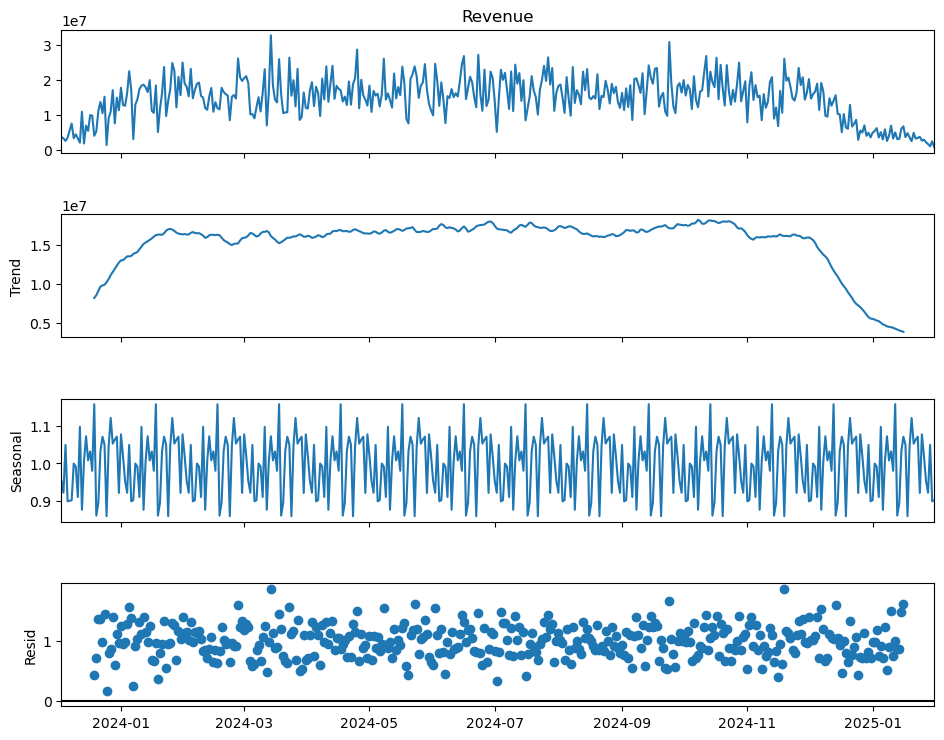

In [20]:
decomposition = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


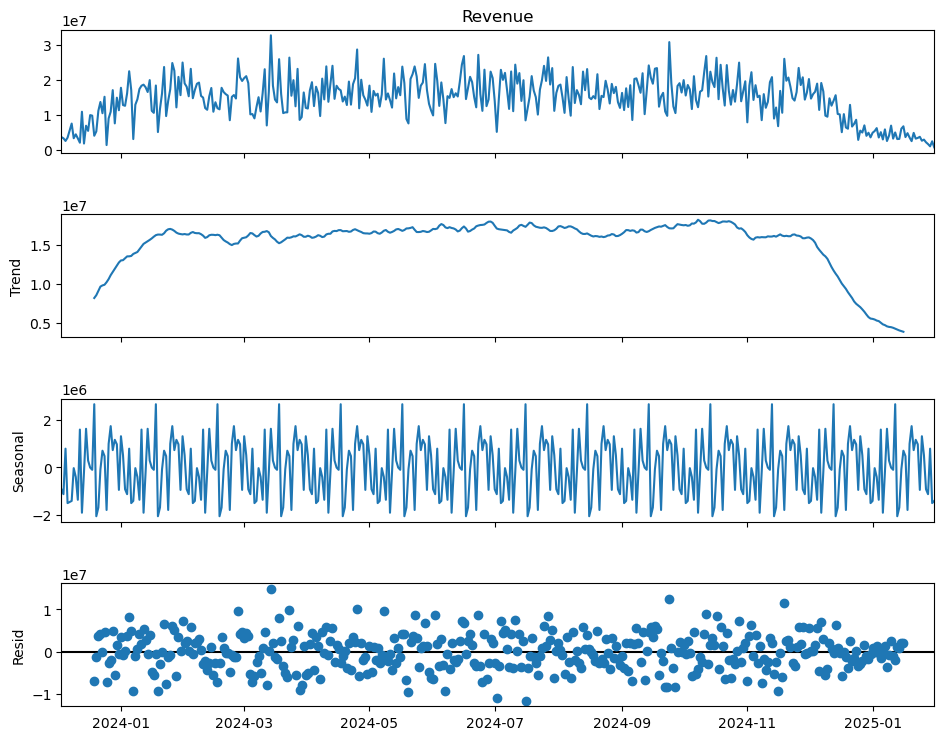

In [21]:
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


Multiplicative fits better:
- Cleaner seasonal pattern in the top figure (values around 1, not wildly swinging).
- Smaller residuals (closer to 1) → means the model explained more of the variation.
- Additive model's residuals are larger, showing it didn't explain the data as well.

## Auto Correlation (ACF)

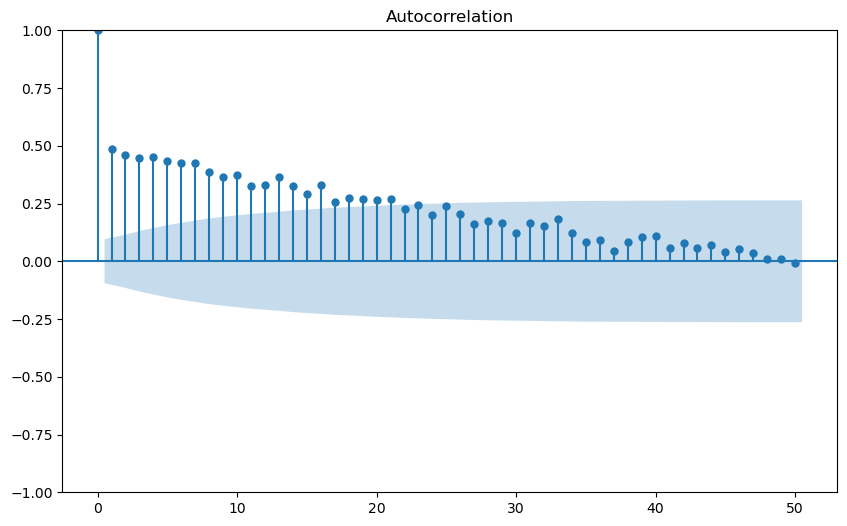

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Revenue'], lags = 50 ,ax = ax)
plt.show()

## Forecasting - Prophet

13:41:35 - cmdstanpy - INFO - Chain [1] start processing
13:41:35 - cmdstanpy - INFO - Chain [1] done processing


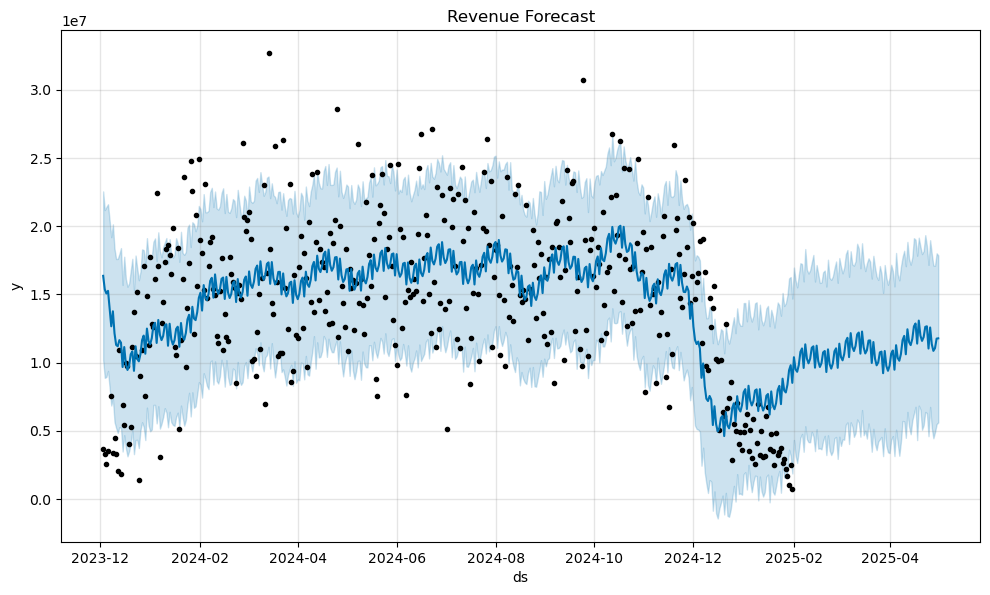

In [ ]:
from prophet import Prophet
revenue_by_creation = df.groupby('Creation Date')['Revenue'].sum().reset_index()

# Rename columns for Prophet
revenue_by_creation.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True, 
    yearly_seasonality=True,  
)

# Fit the model
model.fit(revenue_by_creation)

# Make future dataframe (let's predict next 90 days)
future = model.make_future_dataframe(periods=90)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('Revenue Forecast')
plt.show()


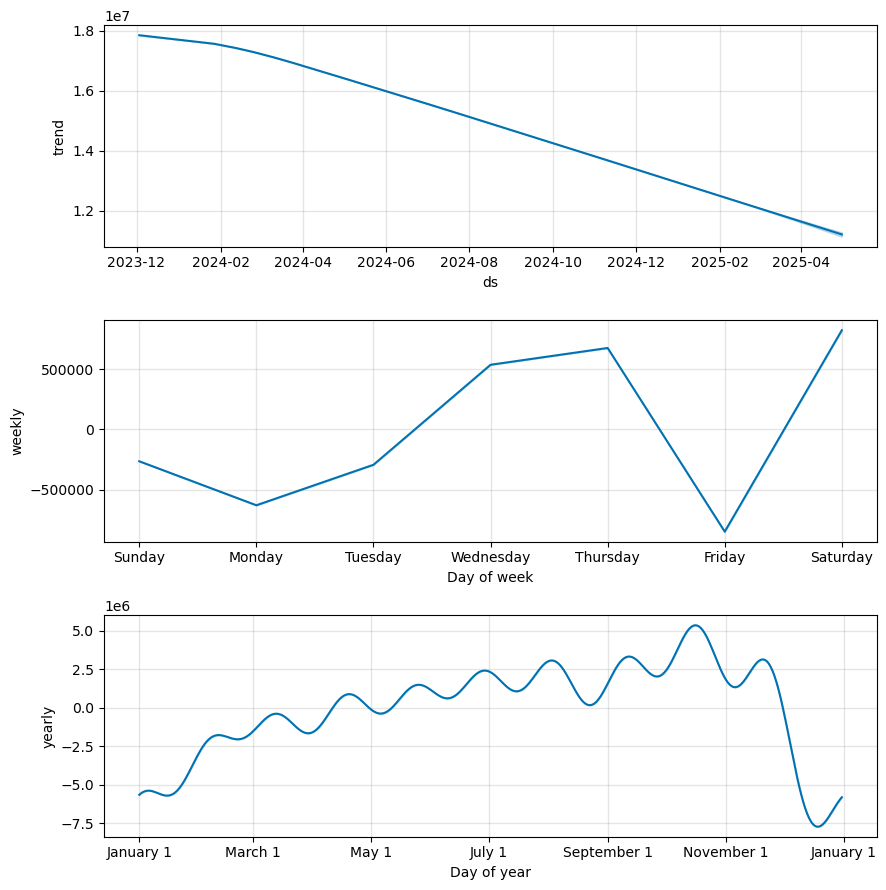

In [26]:
# Plot components (trend, weekly seasonality, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()